<a href="https://colab.research.google.com/github/Samplergithub769/mtu-xsens-imu-Sensor/blob/main/mtu_xsens_imu_Sensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

**Load Datasets**

In [23]:
# --- Helper Function to Load Data and Add is_disturbed ---
def load_dataset(filepath, is_disturbed):
    df = pd.read_csv(filepath, skiprows=12)
    df['is_disturbed'] = is_disturbed
    return df



In [24]:
df_25hz = load_dataset('25hz.csv', is_disturbed=0)
df_50hz = load_dataset('50hz.csv', is_disturbed=0)
df_100hz = load_dataset('100hz.csv', is_disturbed=0)

df_noise_25hz = load_dataset('Noise_25HZ.csv', is_disturbed=1)
df_noise_50hz = load_dataset('Noise_50hz.csv', is_disturbed=1)
df_noise_100hz = load_dataset('Noise_100hz.csv', is_disturbed=1)

In [25]:
df_25hz


,PacketCounter,SampleTimeFine,Acc_X,Acc_Y,Acc_Z,AccHR_X,AccHR_Y,AccHR_Z,Mag_X,Mag_Y,Mag_Z,Roll,Pitch,Yaw,Temperature,is_disturbed
0,57364,38214066,0.0,0.0,0.0,-0.004889,0.327786,9.762954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,57366,38214106,0.0,0.0,0.0,-0.043509,0.356337,9.739222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,57368,38214145,0.0,0.0,0.0,-0.029078,0.342039,9.739135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,57369,38214165,0.0,0.0,0.0,-0.000167,0.342172,9.762895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,57371,38214205,0.0,0.0,0.0,0.019263,0.313533,9.781975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529995,42047,58991946,0.0,0.0,0.0,-0.009468,0.333124,9.748071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
529996,42050,58991985,0.0,0.0,0.0,-0.018941,0.342655,9.767309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
529997,42052,58992025,0.0,0.0,0.0,0.000241,0.328382,9.762392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
529998,42054,58992065,0.0,0.0,0.0,-0.004386,0.333147,9.786397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [26]:
df_50hz

,PacketCounter,SampleTimeFine,Acc_X,Acc_Y,Acc_Z,AccHR_X,AccHR_Y,AccHR_Z,Mag_X,Mag_Y,Mag_Z,Roll,Pitch,Yaw,Temperature,is_disturbed
0,36606,7038992,-0.101958,0.163662,9.798375,0.000000,0.000000,0.000000,-0.69973,0.049174,-0.493465,1.108056,0.699748,-88.599878,30.05,0
1,36609,7039043,0.000000,0.000000,0.000000,-0.142970,0.236342,9.797568,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0
2,36610,7039062,0.000000,0.000000,0.000000,-0.133592,0.231600,9.768730,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0
3,36612,7039102,0.000000,0.000000,0.000000,-0.148095,0.245896,9.759227,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0
4,36614,7039142,0.000000,0.000000,0.000000,-0.147751,0.226745,9.792824,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362669,59638,21654946,0.000000,0.000000,0.000000,-0.028669,0.241345,9.744211,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0
362670,59640,21654986,0.000000,0.000000,0.000000,-0.033083,0.231748,9.787422,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0
362671,59643,21655025,0.000000,0.000000,0.000000,0.000081,0.236691,9.744000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0
362672,59645,21655065,0.000000,0.000000,0.000000,-0.033127,0.217383,9.773057,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0


In [27]:
df_100hz

,PacketCounter,SampleTimeFine,Acc_X,Acc_Y,Acc_Z,AccHR_X,AccHR_Y,AccHR_Z,Mag_X,Mag_Y,Mag_Z,Roll,Pitch,Yaw,Temperature,is_disturbed
0,42919,960335,0.0,0.0,0.0,-0.609062,0.420634,9.719525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,42923,960375,0.0,0.0,0.0,-0.613667,0.420611,9.743539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,42928,960414,0.0,0.0,0.0,-0.613527,0.454127,9.781851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,42932,960454,0.0,0.0,0.0,-0.580179,0.459070,9.762406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,42937,960494,0.0,0.0,0.0,-0.627840,0.458848,9.791543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390259,48575,16394798,0.0,0.0,0.0,-0.455576,0.440417,9.771150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
390260,48579,16394837,0.0,0.0,0.0,-0.460269,0.411668,9.766435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
390261,48583,16394877,0.0,0.0,0.0,-0.445707,0.368643,9.766392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
390262,48588,16394917,0.0,0.0,0.0,-0.474122,0.339781,9.790633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [28]:
df_noise_25hz

,PacketCounter,SampleTimeFine,Acc_X,Acc_Y,Acc_Z,AccHR_X,AccHR_Y,AccHR_Z,Mag_X,Mag_Y,Mag_Z,Roll,Pitch,Yaw,Temperature,is_disturbed
0,29451,3171089,0.0,0.0,0.0,0.249836,0.258465,9.740667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,29453,3171129,0.0,0.0,0.0,0.269149,0.239405,9.750143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,29455,3171169,0.0,0.0,0.0,0.254872,0.244124,9.764629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,29457,3171208,0.0,0.0,0.0,0.264353,0.248957,9.754959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,29460,3171248,0.0,0.0,0.0,0.254652,0.244124,9.735859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97667,35503,7002926,0.0,0.0,0.0,-3.368168,0.137371,9.191718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
97668,35505,7002966,0.0,0.0,0.0,-3.339472,0.127932,9.181927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
97669,35507,7003006,0.0,0.0,0.0,-3.349003,0.118314,9.182014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
97670,35509,7003045,0.0,0.0,0.0,-3.363483,0.151754,9.186865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [29]:
df_noise_50hz

,PacketCounter,SampleTimeFine,Acc_X,Acc_Y,Acc_Z,AccHR_X,AccHR_Y,AccHR_Z,Mag_X,Mag_Y,Mag_Z,Roll,Pitch,Yaw,Temperature,is_disturbed
0,7093,14284182,0.000000,0.000000,0.000000,-2.869573,0.052268,9.342918,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1
1,7095,14284222,0.000000,0.000000,0.000000,-2.859960,0.052313,9.347641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1
2,7097,14284261,0.000000,0.000000,0.000000,-2.855019,0.042760,9.362004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1
3,7101,14284332,-2.861004,0.047889,9.350098,0.000000,0.000000,0.000000,0.315287,-0.661978,-0.510735,0.794072,16.812263,165.393556,28.85,1
4,7104,14284381,0.000000,0.000000,0.000000,-2.874600,0.080970,9.328524,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97729,28315,18217244,0.000000,0.000000,0.000000,-0.917821,0.047197,9.701907,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1
97730,28319,18217324,0.000000,0.000000,0.000000,-0.917974,0.056772,9.687507,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1
97731,28322,18217363,0.000000,0.000000,0.000000,-0.922586,0.066324,9.716299,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1
97732,28324,18217403,0.000000,0.000000,0.000000,-0.917726,0.066346,9.725853,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1


In [30]:
df_noise_100hz

,PacketCounter,SampleTimeFine,Acc_X,Acc_Y,Acc_Z,AccHR_X,AccHR_Y,AccHR_Z,Mag_X,Mag_Y,Mag_Z,Roll,Pitch,Yaw,Temperature,is_disturbed
0,16892,19319519,0.0,0.0,0.0,-0.131993,0.031852,9.753344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,16897,19319559,0.0,0.0,0.0,-0.117286,0.012770,9.786829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,16900,19319589,0.0,0.0,0.0,-0.112835,0.046302,9.762765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,16905,19319638,0.0,0.0,0.0,-0.098794,0.036795,9.714721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,16909,19319668,0.0,0.0,0.0,-0.127397,0.041449,9.734112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85208,64667,22709038,0.0,0.0,0.0,0.091821,0.209589,9.732641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
85209,64672,22709078,0.0,0.0,0.0,0.082333,0.214332,9.747093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
85210,64676,22709118,0.0,0.0,0.0,0.115760,0.233636,9.746809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
85211,64681,22709157,0.0,0.0,0.0,0.096630,0.228760,9.746962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [31]:
df_all = pd.concat([df_25hz, df_50hz, df_100hz, df_noise_25hz, df_noise_50hz, df_noise_100hz], ignore_index=True)


In [32]:
print("Columns:", df_all.columns.tolist())


Columns: ['PacketCounter', 'SampleTimeFine', 'Acc_X', 'Acc_Y', 'Acc_Z', 'AccHR_X', 'AccHR_Y', 'AccHR_Z', 'Mag_X', 'Mag_Y', 'Mag_Z', 'Roll', 'Pitch', 'Yaw', 'Temperature', 'is_disturbed']


In [36]:
feature_columns = [
    'Acc_X', 'Acc_Y', 'Acc_Z',
    'Mag_X', 'Mag_Y', 'Mag_Z',
    'Roll', 'Pitch', 'Yaw'
]

target_column = 'Temperature'

In [37]:
# --- Prepare Data ---
X = df_all[feature_columns]
y = df_all[target_column]

In [38]:
# --- Split Train/Test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [39]:
# --- Build Model ---
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [40]:
# --- Predict ---
y_pred = model.predict(X_test)

In [41]:
# --- Evaluate ---
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [42]:
print(f"\nMean Squared Error: {mse:.2f}")
print(f"R2 Score (Precision ↑): {r2:.2f}")


Mean Squared Error: 0.00
R2 Score (Precision ↑): 1.00


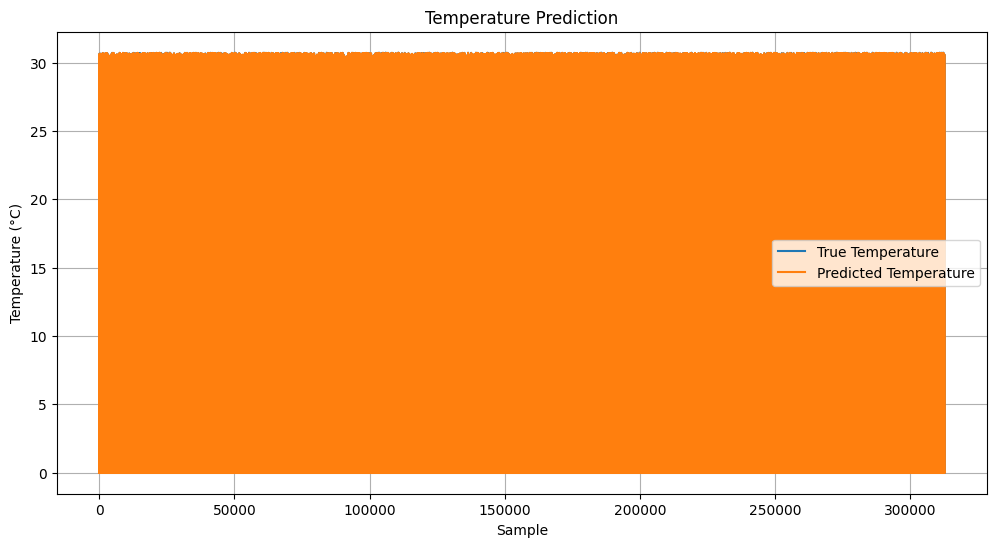

In [43]:
# --- Plot Predictions ---
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='True Temperature')
plt.plot(y_pred, label='Predicted Temperature')
plt.title('Temperature Prediction')
plt.xlabel('Sample')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()

In [44]:
# --- Optional: Save Model (joblib) ---
import joblib
joblib.dump(model, 'temperature_model_rf.joblib')
print("Model saved as 'temperature_model_rf.joblib'")

Model saved as 'temperature_model_rf.joblib'
